<h2 align='center'>Principal Component Analysis</h2>

In [4]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
dataset.data.shape

(1797, 64)

In [6]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
zero_img = dataset.data[0].reshape(8,8)
zero_img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

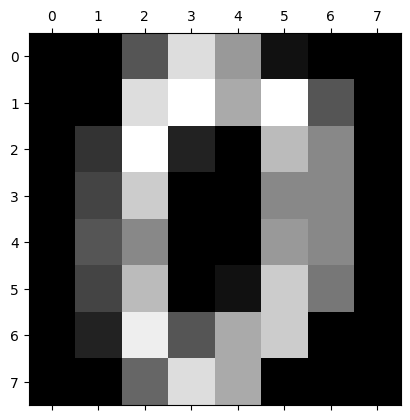

In [8]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(zero_img)
plt.show()

In [9]:
df = pd.DataFrame(dataset.data, 
                  columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
X = df
y = dataset.target

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X_scaled, y, 
                 test_size=0.2, 
                 random_state=30)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

<h3>Use PCA to reduce dimensions</h3>

In [14]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


<h4>Use components such that 95% of variance is retained</h4>

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [19]:
# 64-29

In [22]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [23]:
pca.n_components_

29

**PCA created 29 components out of 64 original columns**

In [24]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [25]:
X_train_pca, X_test_pca, y_train, y_test = \
train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [26]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

**Let's now select only two components**

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [29]:
# X_pca

In [30]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

**You can see that both combined retains 0.14+0.13=0.27 or 27% of important feature information**

In [32]:
X_train_pca, X_test_pca, y_train, y_test = \
train_test_split(X_pca, y, 
                 test_size=0.2, 
                 random_state=30)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

We get less accuancy (~60%) as using only 2 components did not retain much of the feature information. However in real life you will find many cases where using 2 or few PCA components can still give you a pretty good accuracy

In [34]:
import warnings
warnings.filterwarnings('ignore')

model_per = {'score': [], 'RS': [],  'Number_Cols': []}

for i in range(1,40):
    for j in range(1,50):
        
        pca = PCA(n_components = i)
        X_pca = pca.fit_transform(X)
        
        X_train_pca, X_test_pca, y_train, y_test = \
        train_test_split(X_pca, y, test_size=0.2, random_state=j)
        
        model = LogisticRegression()
        model.fit(X_train_pca, y_train)
        score = model.score(X_test_pca, y_test)
        
        
        model_per['score'].append(score)
        model_per['RS'].append(j)
        model_per['Number_Cols'].append(i)
        
        print(i,j)
        display(clear=True)
        
print('Done')

Done


In [36]:
model_df = pd.DataFrame(model_per)
model_df

,score,RS,Number_Cols
0,0.375000,1,1
1,0.333333,2,1
2,0.341667,3,1
3,0.344444,4,1
4,0.302778,5,1
...,...,...,...
1906,0.955556,45,39
1907,0.955556,46,39
1908,0.966667,47,39
1909,0.955556,48,39


In [46]:
model_df[model_df['score'] == model_df['score'].max()]

,score,RS,Number_Cols
1856,0.988889,44,38
1905,0.988889,44,39


In [47]:
model_df

,score,RS,Number_Cols
0,0.375000,1,1
1,0.333333,2,1
2,0.341667,3,1
3,0.344444,4,1
4,0.302778,5,1
...,...,...,...
1906,0.955556,45,39
1907,0.955556,46,39
1908,0.966667,47,39
1909,0.955556,48,39


In [48]:
model_df.loc[4,'score']

0.30277777777777776

In [49]:
model_df.loc[1908,]

score           0.966667
RS             47.000000
Number_Cols    39.000000
Name: 1908, dtype: float64

In [51]:
model_df

,score,RS,Number_Cols
0,0.375000,1,1
1,0.333333,2,1
2,0.341667,3,1
3,0.344444,4,1
4,0.302778,5,1
...,...,...,...
1906,0.955556,45,39
1907,0.955556,46,39
1908,0.966667,47,39
1909,0.955556,48,39


In [53]:
model_df.iloc[:,1]

0        1
1        2
2        3
3        4
4        5
        ..
1906    45
1907    46
1908    47
1909    48
1910    49
Name: RS, Length: 1911, dtype: int64

In [54]:
model_df.iloc[:,[1,2]]

,RS,Number_Cols
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
1906,45,39
1907,46,39
1908,47,39
1909,48,39


In [62]:
model_df.index//2 == 0

array([ True,  True, False, ..., False, False, False])

In [76]:
model_df.iloc[list(range(0,1912,2)),:]

,score,RS,Number_Cols
0,0.375000,1,1
2,0.341667,3,1
4,0.302778,5,1
6,0.330556,7,1
8,0.352778,9,1
...,...,...,...
1902,0.966667,41,39
1904,0.969444,43,39
1906,0.955556,45,39
1908,0.966667,47,39


In [73]:
# model_df.shape[0]

In [81]:
model_df.iloc[list(range(1,1910,2)),:].head(5)

,score,RS,Number_Cols
1,0.333333,2,1
3,0.344444,4,1
5,0.341667,6,1
7,0.341667,8,1
9,0.411111,10,1
